# Ford GoBike System Data
## by Omar Hosny

## Preliminary Wrangling

> In this notebook we will work on wrangling and exploring Ford GoBike dataset. 

## Table of Contents:
- [Dataset](#dataset)
- [Preliminary Wrangling](#wrangle)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

## Dataset <a id='dataset'></a>
The dataset in hand is for Ford Go Bike System data which contains information about bike trips for customers and subscribers, after dropping missing values the dataset is now 174,952 rows with 16 variables. 9 of which are numerical, 2 datetime variables and 5 other categorical variables. I'm interested in studying the trip duration and how it relates to member's age, member's gender and member's type. I'm also interested in studying the trip's start time distribution through the weekdays and weekends.

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preliminary Wrangling<a id='wrangle'></a>

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Required changes:
> change start_time and end_time to datetime
> 
> explore the count and percentage of missing values in each variables before dropping

- change start_time and end_time to datetime

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

- plot the missing values

c:\users\maccah\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


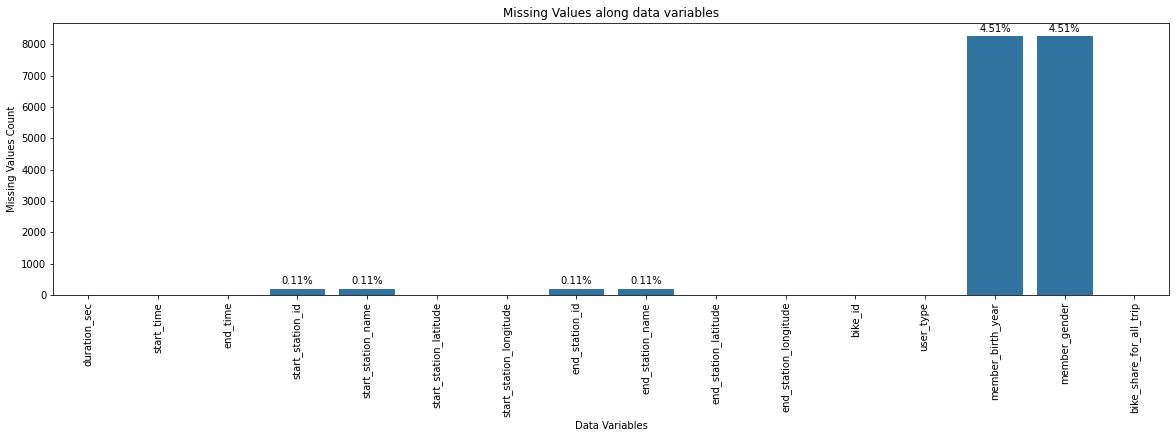

In [6]:
plt.figure(figsize=(20, 5));

base_color = sb.color_palette()[0]
na_counts = df.isna().sum()
sb.barplot(na_counts.index.values, na_counts, color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Data Variables')
plt.ylabel('Missing Values Count')
plt.title('Missing Values along data variables');
for i in range(na_counts.shape[0]):
    count = na_counts[i]
    count_ratio = (count/df.shape[0]) * 100
    if count_ratio != 0:
        text = "{:0.02f}%".format(count_ratio)
        plt.text(i, count+400, text, ha='center', va='top');
        


> maximum ratio of missing values are in 'member_birth_year' and 'member_gender' and it doesn't exceed 5% of the dataframe. We can then drop the missing values in the dataframe to better work with clean data.

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> After dropping missing values the dataset is now 174,952 rows with 16 variables. 9 of which are numerical, 2 datetime variables and 5 other categorical variables.   

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in studying the trip duration and how it relates to member's age, member's gender and member's type.
> I'm also interested in studying the start_time distribution through the weekdays. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, member_birth_year, member_gender, user_type, start_time

## Univariate Exploration <a id='uni'></a>

- let's extract the weekday from start_time

In [8]:
df['start_weekday'] = df['start_time'].dt.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
})
df['start_weekday'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_weekday, dtype: int64

- let's now plot the weekdays with on a bar chart

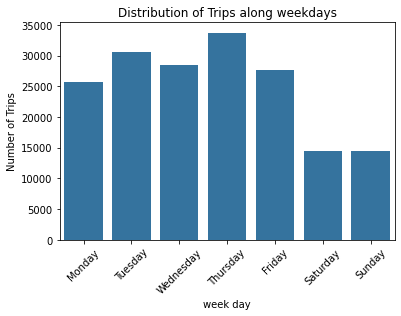

In [9]:
base_color = sb.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='start_weekday', order=order, color=base_color, saturation=0.7);
plt.xticks(rotation=45);
plt.xlabel('week day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips along weekdays');

> We can see that our service is more used (almost double) during weekdays compared to weekends.

- let's have a look now on the distribution of the duration

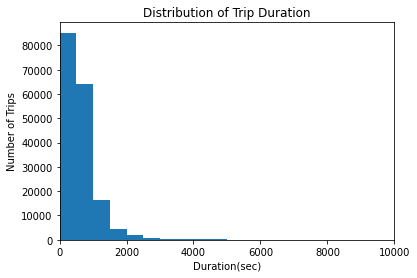

In [10]:
bins = np.arange(0, df['duration_sec'].max()+500, 500)
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xlim(0, 10000);
plt.xlabel('Duration(sec)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration');

> distribution is a very right skewed, let's plot it on a log scale

In [11]:
np.log10(df['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

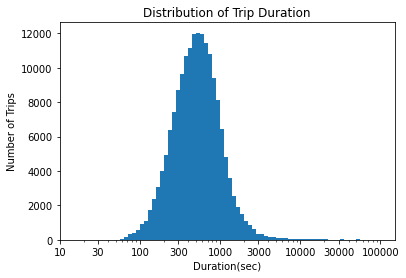

In [12]:
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.hist(data=df, x='duration_sec', bins=bins);
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ["{}".format(v) for v in ticks]
plt.xlabel('Duration(sec)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration')
plt.xscale('log');
plt.xticks(ticks, labels);

> This plot shows that an average trip duration will vary from 200 secs to 1000 secs

- now let's get the user's age and plot it

In [13]:
df['age'] = 2019 - df['member_birth_year']
df['age'].value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
91.0         1
89.0         1
109.0        1
141.0        1
92.0         1
Name: age, Length: 75, dtype: int64

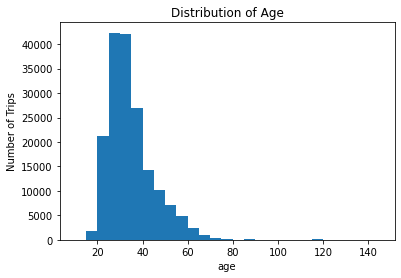

In [14]:
bins = np.arange(10, df['age'].max()+5, 5)
plt.hist(data=df, x='age', bins=bins);
plt.xlabel('age')
plt.ylabel('Number of Trips')
plt.title('Distribution of Age');

- let's investigate the age  above 110 years

In [15]:
df[df['age'] > 110]['age'].value_counts()

119.0    53
117.0    11
118.0     6
141.0     1
Name: age, dtype: int64

> most probably this data is an input mistake from the user when signing up to our system. So, let's limit our plot to 100 years and increase the number of bins

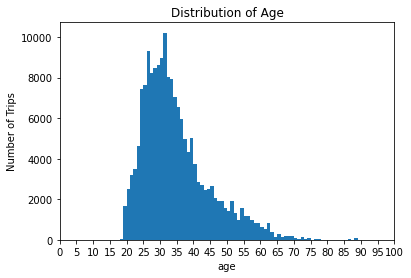

In [16]:
bins = np.arange(10, df['age'].max()+1, 1)
plt.hist(data=df, x='age', bins=bins);
plt.xlabel('age')
plt.ylabel('Number of Trips')
plt.title('Distribution of Age');
ticks = [i for i in range(0, 105, 5)]
plt.xlim(0, 100)
plt.xticks(ticks);

> this visualization suggest that the huge number of our users are between 25 and 40 years. 

let's now plot the member gender

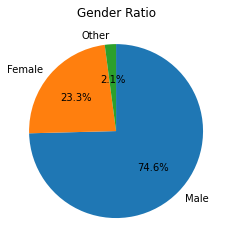

In [17]:
# sb.countplot(data=df, x='member_gender');
sorted_counts = df['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.title('Gender Ratio');

> This Pie Chart shows that around 75% of our users are males.

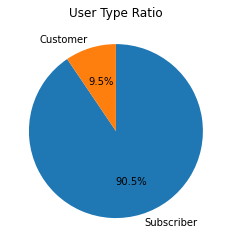

In [18]:
# sb.countplot(data=df, x='member_gender');
sorted_counts = df['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('User Type Ratio');

> This pie chart also shows that more than 90% of the users in this dataset are subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes, when plotting the trip duration, it was very right skewed, and so, a log scaling was a better choice to better understand the plot

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes, there are a number of irrational ages for users, this is probably due to a mistake from the user during registeration. That's why I chose to limit my plots to a maximum of 100 years age. 

## Bivariate Exploration <a id='bi'></a>

- let's extract the start_hour from the start_time and plot it against weekdays to see what are the rush hours for each weekday

In [19]:
# extract start_hour from start_time
df['start_hour'] = df['start_time'].dt.hour

In [20]:
# let's convert the weekdays into an ordered categorical type
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=order)
df['start_weekday'] = df['start_weekday'].astype(weekdays);

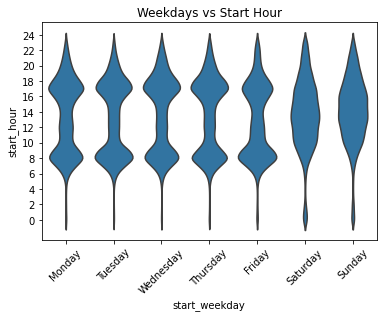

In [21]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='start_weekday', y='start_hour', color=base_color, inner=None);
yticks = [i for i in range(0, 25, 2)]
plt.title('Weekdays vs Start Hour')
plt.xticks(rotation=45);
plt.yticks(yticks);

> for weekdays(from Monday to Friday), rush hours are between 7 am - 9 am and between 4 pm - 6 pm. However for weekeneds, the distribution is random from 6 am to 12 pm with most of the data falls between 12 pm and 6 pm. This suggests that our service is widely used by our users to go from and to their jobs during weekdays. 

- let's now see if there is a relation between age and duration by dropping a scatter plot

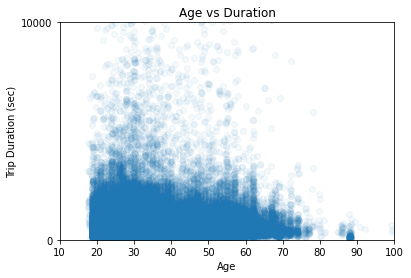

In [22]:
sb.regplot(data=df, x='age', y='duration_sec',  x_jitter=0.3, scatter_kws={'alpha': 1/20}, fit_reg=False);
yticks = [i for i in range(0, 90000, 10000)]
plt.yticks(yticks)
plt.xlim(10, 100)
plt.ylim(0, 10000)
plt.title('Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

- let's have another look to the same relation but with a heat map this time

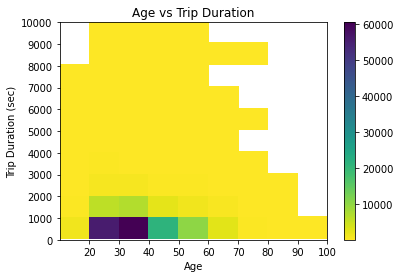

In [23]:
bins_x = np.arange(10, 141+10, 10)
bins_y = np.arange(60, 10000+1000, 1000)
plt.hist2d(data=df, x='age', y='duration_sec', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
xticks = [i for i in range(20, 110, 10)]
yticks = [i for i in range(0, 11000, 1000)]
plt.xlim(10, 100)
plt.ylim(0, 10000)
plt.colorbar()
plt.title('Age vs Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');
plt.xticks(xticks)
plt.yticks(yticks);

> There is no interesting relation shown between age and trip duration. that the big bulk of our users are between 20 and 40 years with trip duration less than 1000 secs.

In [24]:
df[['age', 'duration_sec']].describe()

,age,duration_sec
count,174952.000000,174952.000000
mean,34.196865,704.002744
std,10.118731,1642.204905
min,18.000000,61.000000
25%,27.000000,323.000000
50%,32.000000,510.000000
75%,39.000000,789.000000
max,141.000000,84548.000000


- let's now have a look on the distribution of duration in each gender

In [25]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

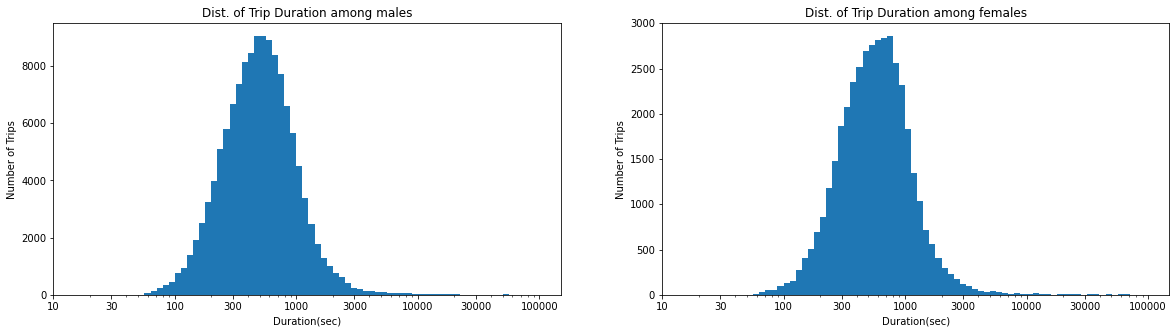

In [26]:
plt.figure(figsize = [20, 5]) 

df_male = df[df['member_gender'] == 'Male']
df_female = df[df['member_gender'] == 'Female']
df_other = df[df['member_gender'] == 'Other']

plt.subplot(1, 2, 1) 
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.hist(data=df_male, x='duration_sec', bins=bins);
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ["{}".format(v) for v in ticks]
plt.xlabel('Duration(sec)')
plt.ylabel('Number of Trips')
plt.title('Dist. of Trip Duration among males')
plt.xscale('log');
plt.xticks(ticks, labels);

plt.subplot(1, 2, 2) 
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.hist(data=df_female, x='duration_sec', bins=bins);
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ["{}".format(v) for v in ticks]
plt.xlabel('Duration(sec)')
plt.ylabel('Number of Trips')
plt.title('Dist. of Trip Duration among females')
plt.xscale('log');
plt.xticks(ticks, labels);

> Though males use our services more than women as shown in the Univariate data exploration(around 75% of the dataset are males). By comparing the trip duration between males and females, seems that there is no much difference between them. 

- let's see the relation the trip duration between customers and subscribers

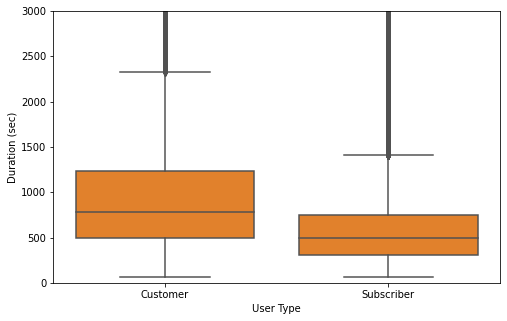

In [27]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(0, 3000)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

> as we can see from the above box plot the customers tend to take the bikes for longer durations per trip. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I expected to see a strong relation between age and duration. However this wasn't the fact. Maybe this confirms with the suggesstion proposed while exploring the weekdays vs start hour which showed that the rush hours of using the service is just before and after normal working hours. This suggests that the trip duration doesn't refer to the individual's general health, but to the distance between his home and work.
>
> I also expected to see a difference between men and women duration. However the distribution is almost identical.
>
> What I found interesting is that customers tend to spend more time on their trips than subscribers. This gives us a preference to make the customers pay for the service based on the time they used the bike. One advantage of this will be the extra money, another advantage is that we are motivating them to subscribe and save themselves some money. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Apart from the main features, I found no interesting relationships yet.

## Multivariate Exploration <a id='multi'></a>

- We can view the Facet the customer type with the age vs duration relationship to see if there is anything interesting. Due to the huge difference in the number of subscribers and customers, we will only work with a random sample of 500 of both.

In [41]:
# split the two dataframes

df_cust = df[df['user_type'] == 'Customer']
df_subs = df[df['user_type'] == 'Subscriber']

# df_subs['user_type'].value_counts()
# take a sample of 300 from both dataframes
sample_cust = np.random.choice(df_cust.shape[0], 500, replace=False)
df_cust_subset = df_cust.iloc[sample_cust]
# df_cust_subset['user_type'].value_counts()
sample_subs = np.random.choice(df_subs.shape[0], 500, replace=False)
df_subs_subset = df_subs.iloc[sample_subs]

# append the 2 dataframes
df_subset = df_cust_subset.append(df_subs_subset)

df_subset['user_type'].value_counts()

Customer      500
Subscriber    500
Name: user_type, dtype: int64

c:\users\maccah\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


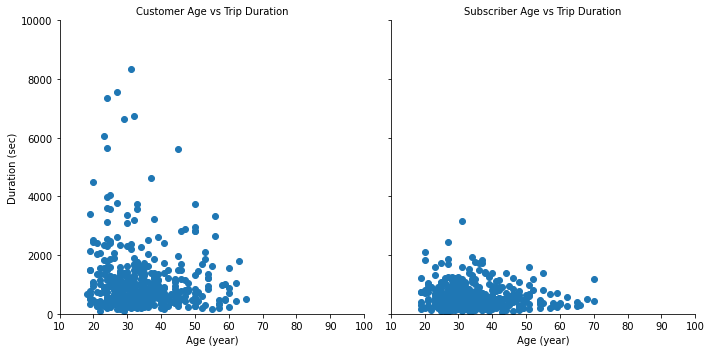

In [43]:
g = sb.FacetGrid(data = df_subset, col = 'user_type', col_wrap=2, size = 5,
                 xlim = [10, 100], ylim = [0, 10000])
g.map(plt.scatter, 'age', 'duration_sec')
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')
g.set_titles(col_template="{col_name} Age vs Trip Duration");
plt.show();

> The chart on the left confirms that the duration spent by customers tend to be higher than of our subscribers. Also, by having a look on both graphs, we can see that the age of our subscribers tend to be slight older than the age of our customers. 

In [30]:
# # let's take a sample first to avoid overlapping a bit
# sample = np.random.choice(df.shape[0], 500, replace=False)
# df_subset = df.iloc[sample]


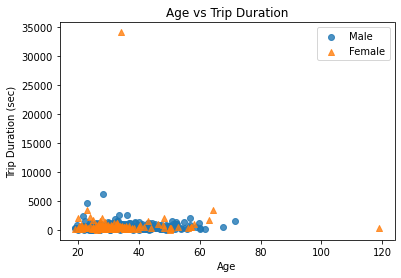

In [32]:
# user_type_markers = [['Male', 'o'],['Female', '^']]
# for utype, marker in user_type_markers:
#     df_utype = df_subset[df_subset['member_gender'] == utype]
#     sb.regplot(data=df_utype, x='age', y='duration_sec', x_jitter=0.4, fit_reg=False, marker=marker);

# plt.title('Age vs Trip Duration')
# plt.xlabel('Age')
# plt.ylabel('Trip Duration (sec)')
# plt.legend(['Male', 'Female']);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  It was confirmed that, the duration spent by customers are higher than of our subscribers and also it was shown that the age of our subscribers tend to be slight older than the age of our customers.

### Were there any interesting or surprising interactions between features?

> No